# Import necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')


# Convert 'date' column to datetime format


In [5]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce', utc=True)


# Set 'date' as the index for time series analysis


In [6]:
df.set_index('date', inplace=True)


### Resample the data to daily frequency, counting the number of articles per day


In [7]:
daily_articles = df.resample('D').size()


# Plot the daily publication frequency over time


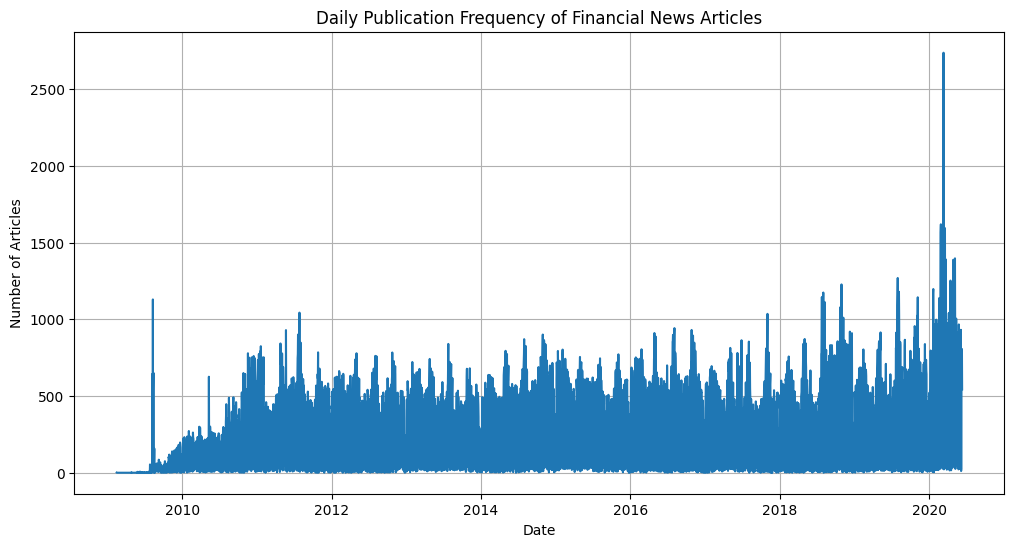

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_articles)
plt.title('Daily Publication Frequency of Financial News Articles')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Identify spikes in publication frequency


In [9]:
spikes = daily_articles[daily_articles > daily_articles.mean() + 2 * daily_articles.std()]
print("Spikes in Publication Frequency:")
print(spikes)

Spikes in Publication Frequency:
date
2009-08-10 00:00:00+00:00    1130
2011-05-23 00:00:00+00:00     930
2011-07-28 00:00:00+00:00    1044
2016-04-28 00:00:00+00:00     911
2016-08-04 00:00:00+00:00     943
                             ... 
2020-05-08 00:00:00+00:00     927
2020-05-13 00:00:00+00:00    1005
2020-05-18 00:00:00+00:00     914
2020-05-26 00:00:00+00:00     967
2020-06-05 00:00:00+00:00     932
Length: 93, dtype: int64


# Analyze publication frequency by hour of the day


In [10]:
df['hour'] = df.index.hour
hourly_articles = df.groupby('hour').size()

# Plot the publication frequency by hour


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_26024\2915522281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_articles.index, y=hourly_articles.values, palette='viridis')


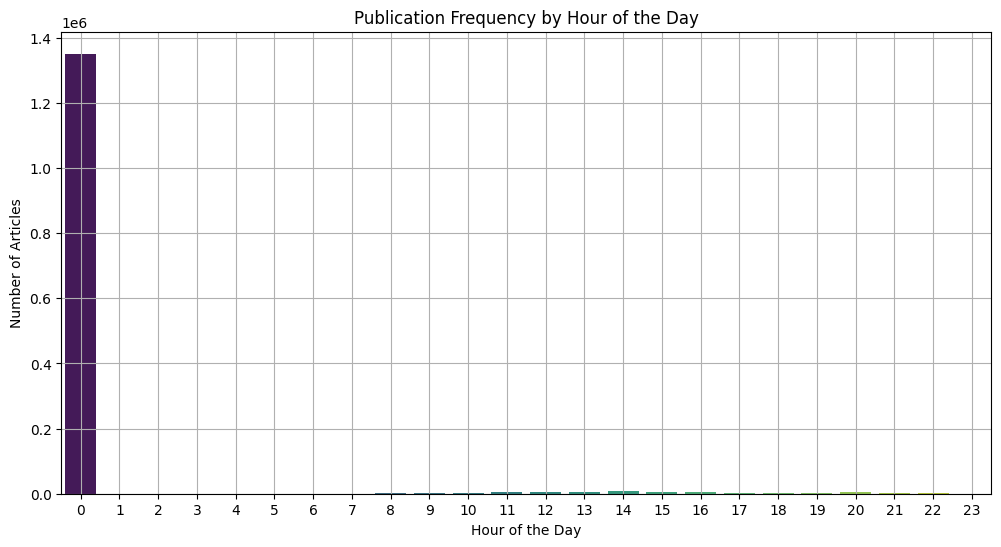

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_articles.index, y=hourly_articles.values, palette='viridis')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Analyze publication frequency by day of the week


In [12]:
df['day_of_week'] = df.index.day_name()
weekly_articles = df.groupby('day_of_week').size()

# Plot the publication frequency by day of the week


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_26024\1952973834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_articles.index, y=weekly_articles.values, palette='viridis')


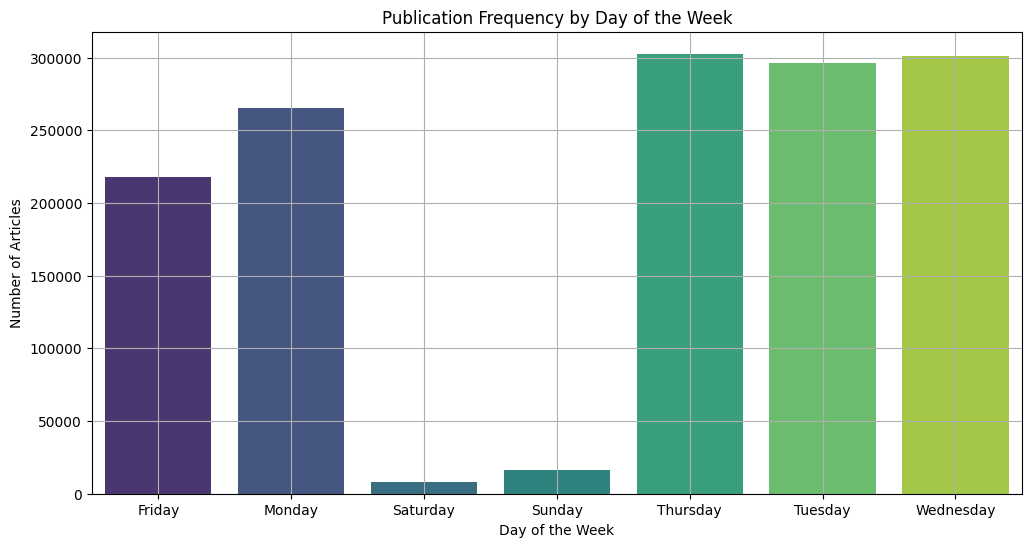

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_articles.index, y=weekly_articles.values, palette='viridis')
plt.title('Publication Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()